# Dataset Preprocessing
This notebook showcases the preprocessing needed to adapt the original dataset to the Twin Matcher project. The 'simple facenet' HuggingFace dataset presents 9k+ images of celebrities, with name labels, of dimensison 160x160. The main correction that will be applied are:
- **Class Imbalance**: set the same number of samples for both images;
- **Name Check**: check for the presence of all needed labels;
- **Format Compatibility**: save the new dataset as an object fitting for HuggingFace dataset library manipulations, which will be needed for training.


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

We will start with importing the dataset, and saving it to access the files.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("lansinuote/simple_facenet")

Generating train split:   0%|          | 0/17334 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
!git lfs install
!git clone https://huggingface.co/datasets/lansinuote/simple_facenet

Git LFS initialized.
Cloning into 'simple_facenet'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (75/75), 8.44 KiB | 375.00 KiB/s, done.
Filtering content: 100% (3/3), 677.65 MiB | 45.53 MiB/s, done.


The files are saved as HuggingFace data dictionaries for accessing the related functions.

In [ ]:
from datasets import load_dataset, DatasetDict, load_from_disk
import pandas as pd
data_dict = DatasetDict()
dataset['train'].save_to_disk('data_dict/train/')
dataset['test'].save_to_disk('data_dict/test/')

dataset["train"] = load_from_disk('data_dict/train')
dataset["test"] = load_from_disk('data_dict/test')

Saving the dataset (0/2 shards):   0%|          | 0/17334 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

We can inspect the contents of a data entry. It contains two objects in a dictionary format:
- **image**: an image that represents the face of a celebrity.
- **label**: the name of the celebrity.

In [ ]:
dataset['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x160>,
 'label': 'Hugh Jackman'}

In [ ]:
from PIL import Image
import io

binary_data = train_df['image'][0]['bytes']

image = Image.open(io.BytesIO(binary_data))

image.save('output.png')


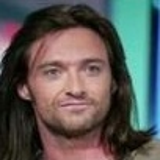

In [ ]:
image

As mentioned before, all images have size (160, 160), which is particularly handy for training.

In [ ]:
from PIL import Image
import numpy as np


image_data = dataset['train'][0]['image']

if isinstance(image_data, Image.Image):
  size = image_data.size

elif isinstance(image_data, np.ndarray):
  print('Not an Image')
  image = Image.fromarray(image_data)
  size = image.size

print("Image size:", size)


Image size: (160, 160)


We can see that all test set labels are present in the training set.

In [ ]:

train_labels = set(entry['label'] for entry in dataset['train'])

test_labels = set(entry['label'] for entry in dataset['test'])

if test_labels.issubset(train_labels):
    print("All test set labels are present in the training set.")
else:
    missing_labels = test_labels - train_labels
    print("The following labels are in the test set but not in the training set:", missing_labels)


All test set labels are present in the training set.


We can check the number of samples per class. We noticed how classes present great inbalance in the number of samples they present. This has led the model to better learn more popular classes compared to minoritarian ones, and will be corrected.

In [ ]:
from collections import Counter

labels = [entry['label'] for entry in dataset['train']]

label_counts = Counter(labels)

num_unique_labels = len(label_counts)

print("Number of unique labels:", num_unique_labels)
print("Counts of each label:", label_counts)


Number of unique labels: 105
Counts of each label: Counter({'Leonardo DiCaprio': 234, 'Robert Downey Jr': 230, 'Katherine Langford': 225, 'Alexandra Daddario': 223, 'elizabeth olsen': 218, 'margot robbie': 217, 'amber heard': 214, 'Adriana Lima': 210, 'Megan Fox': 209, 'Logan Lerman': 209, 'alycia dabnem carey': 208, 'Emilia Clarke': 207, 'Emma Watson': 207, 'Brenton Thwaites': 206, 'Sophie Turner': 204, 'kiernen shipka': 201, 'scarlett johansson': 199, 'barbara palvin': 197, 'Anne Hathaway': 196, 'Andy Samberg': 195, 'Tom Hardy': 195, 'gal gadot': 194, 'Maisie Williams': 193, 'Natalie Dormer': 192, 'Henry Cavil': 192, 'Tom Cruise': 190, 'Madelaine Petsch': 189, 'Millie Bobby Brown': 189, 'Zac Efron': 189, 'Tom Holland': 187, 'ellen page': 186, 'Gwyneth Paltrow': 184, 'Selena Gomez': 183, 'grant gustin': 183, 'Zoe Saldana': 183, 'Jason Momoa': 181, 'Tom Hiddleston': 180, 'Johnny Depp': 180, 'Danielle Panabaker': 180, 'Hugh Jackman': 178, 'tom ellis': 178, 'Wentworth Miller': 178, 'Mark

In [ ]:
from collections import Counter

labels = [entry['label'] for entry in dataset['test']]

label_counts = Counter(labels)

num_unique_labels = len(label_counts)

print("Number of unique labels:", num_unique_labels)
print("Counts of each label:", label_counts)


Number of unique labels: 87
Counts of each label: Counter({'Anne Hathaway': 7, 'Natalie Dormer': 6, 'gal gadot': 5, 'Stephen Amell': 4, 'Sarah Wayne Callies': 4, 'Emma Watson': 4, 'amber heard': 4, 'Richard Harmon': 4, 'margot robbie': 4, 'Mark Zuckerberg': 3, 'Logan Lerman': 3, 'Gwyneth Paltrow': 3, 'Madelaine Petsch': 3, 'Jennifer Lawrence': 3, 'Shakira Isabel Mebarak': 3, 'Leonardo DiCaprio': 3, 'Krysten Ritter': 3, 'Pedro Alonso': 3, 'Brenton Thwaites': 3, 'Robert Downey Jr': 3, 'Zoe Saldana': 3, 'Rihanna': 3, 'Jimmy Fallon': 3, 'Adriana Lima': 3, 'Emilia Clarke': 3, 'Selena Gomez': 3, 'Dominic Purcell': 3, 'Irina Shayk': 3, 'Tom Hardy': 3, 'barack obama': 3, 'Rebecca Ferguson': 3, 'Jason Momoa': 3, 'elizabeth olsen': 3, 'alycia dabnem carey': 3, 'Henry Cavil': 3, 'Tom Holland': 2, 'Christian Bale': 2, 'Ursula Corbero': 2, 'ellen page': 2, 'Natalie Portman': 2, 'Alexandra Daddario': 2, 'Penn Badgley': 2, 'Morena Baccarin': 2, 'Taylor Swift': 2, 'Eliza Taylor': 2, 'Inbar Lavi': 2, '

We can correct this issue by creating new splits with the same number of images per class, shuffling them and selecting them at random.

In [ ]:
import os
import shutil
import random

train_dir = 'train'
new_train_dir = 'train_85'
os.makedirs(new_train_dir, exist_ok=True)

for label_folder in os.listdir(train_dir):
    old_folder_path = os.path.join(train_dir, label_folder)
    new_folder_path = os.path.join(new_train_dir, label_folder)

    if os.path.isdir(old_folder_path):
        os.makedirs(new_folder_path, exist_ok=True)

        image_files = [file for file in os.listdir(old_folder_path) if file.endswith('.png')]

        random.shuffle(image_files)
        selected_images = image_files[:85]

        for image in selected_images:
            shutil.copy(os.path.join(old_folder_path, image), new_folder_path)

print("Images have been organized into new folders with each containing up to 85 images.")


Images have been organized into new folders with each containing up to 85 images.


In [ ]:
train_dir = 'test'
new_train_dir = 'test_85'
os.makedirs(new_train_dir, exist_ok=True)

for label_folder in os.listdir(train_dir):
    old_folder_path = os.path.join(train_dir, label_folder)
    new_folder_path = os.path.join(new_train_dir, label_folder)
    if os.path.isdir(old_folder_path):
        os.makedirs(new_folder_path, exist_ok=True)

        image_files = [file for file in os.listdir(old_folder_path) if file.endswith('.png')]

        random.shuffle(image_files)
        selected_images = image_files[:1]

        for image in selected_images:
            shutil.copy(os.path.join(old_folder_path, image), new_folder_path)



In [ ]:
from collections import Counter

labels = [entry['label'] for entry in reduced_dataset]

label_counts = Counter(labels)

num_unique_labels = len(label_counts)

print("Number of unique labels:", num_unique_labels)
print("Counts of each label:", label_counts)

Number of unique labels: 105
Counts of each label: Counter({'Hugh Jackman': 85, 'Tom Hiddleston': 85, 'Natalie Dormer': 85, 'Robert De Niro': 85, 'Brie Larson': 85, 'Emilia Clarke': 85, 'Tom Cruise': 85, 'Emma Stone': 85, 'Anthony Mackie': 85, 'Amanda Crew': 85, 'Megan Fox': 85, 'elizabeth olsen': 85, 'Zendaya': 85, 'Robert Downey Jr': 85, 'Maria Pedraza': 85, 'Irina Shayk': 85, 'Selena Gomez': 85, 'Alexandra Daddario': 85, 'ellen page': 85, 'Johnny Depp': 85, 'margot robbie': 85, 'Chris Evans': 85, 'Adriana Lima': 85, 'Taylor Swift': 85, 'Katherine Langford': 85, 'Brenton Thwaites': 85, 'Danielle Panabaker': 85, 'Rebecca Ferguson': 85, 'Tom Holland': 85, 'tom ellis': 85, 'jeff bezos': 85, 'Anne Hathaway': 85, 'Madelaine Petsch': 85, 'Morgan Freeman': 85, 'Christian Bale': 85, 'Ursula Corbero': 85, 'Maisie Williams': 85, 'Sophie Turner': 85, 'Natalie Portman': 85, 'Jake Mcdorman': 85, 'Krysten Ritter': 85, 'Penn Badgley': 85, 'melissa fumero': 85, 'Lili Reinhart': 85, 'Bobby Morley': 8

#Save and Upload
Now we can mount Google Drive to save the images locally. Not only that, we can also create a new HuggingFace dataset with our images which we will use to train our model in the training pipeline. HuggingFace datasets allow easy access and can benefit from integrated functionalities.

In [ ]:
from google.colab import drive
drive.mount('dataset_storage', force_remount = True)

Mounted at dataset_storage


In [ ]:
import os

os.mkdir('dataset_storage/MyDrive/dataset/')
os.mkdir('dataset_storage/MyDrive/dataset/train')
os.mkdir('dataset_storage/MyDrive/dataset/test')

def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size


The new dataset will be available on the HuggingFace space [SaladSlayer00/twin_matcher](https://huggingface.co/datasets/SaladSlayer00/twin_matcher/viewer/default/train?p=89)

In [ ]:
import os
from datasets import load_dataset, load_metric, Image, DatasetDict, Dataset
from huggingface_hub import HfApi, Repository

def create_dataset(image_dir):

    data = {'image': [], 'label': []}

    for label in os.listdir(image_dir):
        if label.startswith('.'):
            continue

        class_dir = os.path.join(image_dir, label)

        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            if image_name.startswith('.'):
                continue

            image_path = os.path.join(class_dir, image_name)
            data['image'].append(image_path)
            data['label'].append(label)

    dataset = Dataset.from_dict(data)
    dataset = dataset.cast_column('image', Image())
    return dataset

train_path = '/content/ds/train'
test_path = '/content/ds/test'

train_dataset = create_dataset(train_path)
test_dataset = create_dataset(test_path)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})


dataset_dict.push_to_hub('SaladSlayer00/twin_matcher')